In [2]:
# ライブラリ読み込み
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from pyspark.mllib.clustering import KMeans as MLKMeans

In [9]:
# constraints
cluster_num = 3

# utilities
def choose_color(i):
    color_dict = {0: 'r', 1: 'g', 2: 'b'}
    return color_dict[i]

def array_map(f, array):
    return np.array(list(map(f, array)))

# create dataset
iris = datasets.load_iris()
dataset = array_map(lambda x: [x[0], x[2]], iris.data)

# initial set of plot
plt.style.use('ggplot')

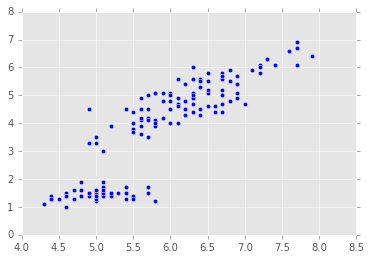

In [10]:
# plot
axis_x_data = array_map(lambda x: (x[0]), dataset)
axis_y_data = array_map(lambda x: (x[1]), dataset)
plt.scatter(axis_x_data, axis_y_data)
plt.show()

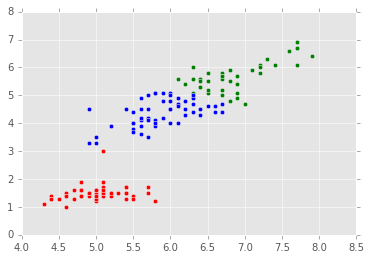

In [12]:
# scikit learn
kmeans_model = KMeans(n_clusters=cluster_num, random_state=10).fit(np.array(dataset))
labels = kmeans_model.predict(dataset)

# plot
for label, feature in zip(labels, dataset):
    color = choose_color(label)
    plt.scatter(feature[0], feature[1], c=color)
plt.show()

/usr/lib/spark/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


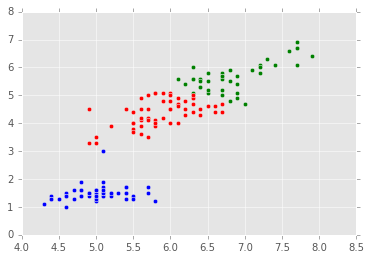

In [14]:
# pyspark
rdd_dataset = sc.parallelize(dataset)
model = MLKMeans.train(rdd_dataset, cluster_num, runs=10, initializationMode="random", seed=None)
labels = array_map(lambda x: model.predict(x), dataset)

# plot
for label, feature in zip(labels, dataset):
    color = choose_color(label)
    plt.scatter(feature[0], feature[1], c=color)
plt.show()